In [1]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

ds_train = image_dataset_from_directory(
    'input/car-or-truck/train',
    labels = 'inferred',
    label_mode = 'binary',
    image_size = [128, 128],
    interpolation = 'nearest',
    batch_size = 64,
    shuffle = True,
).cache()

ds_valid = image_dataset_from_directory(
    'input/car-or-truck/valid',
    labels = 'inferred',
    label_mode = 'binary',
    image_size = [128, 128],
    interpolation = 'nearest',
    batch_size = 64,
    shuffle = False,
).cache()

def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)


Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [2]:
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers.experimental import preprocessing

model = keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomContrast(0.5),
    preprocessing.RandomZoom(0.1),
    
    layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same',
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    layers.Flatten(),
    layers.Dense(units=16, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])

In [3]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=25,
)

Epoch 1/25
80/80 [==============================] - 20s 183ms/step - loss: 0.6677 - binary_accuracy: 0.5759 - val_loss: 0.6582 - val_binary_accuracy: 0.6219
Epoch 2/25
80/80 [==============================] - 12s 154ms/step - loss: 0.6469 - binary_accuracy: 0.6230 - val_loss: 0.6373 - val_binary_accuracy: 0.6500
Epoch 3/25
80/80 [==============================] - 13s 157ms/step - loss: 0.6270 - binary_accuracy: 0.6506 - val_loss: 0.5999 - val_binary_accuracy: 0.6969
Epoch 4/25
80/80 [==============================] - 12s 150ms/step - loss: 0.6146 - binary_accuracy: 0.6541 - val_loss: 0.5899 - val_binary_accuracy: 0.7086
Epoch 5/25
80/80 [==============================] - 12s 151ms/step - loss: 0.5830 - binary_accuracy: 0.7004 - val_loss: 0.5503 - val_binary_accuracy: 0.7385
Epoch 6/25
80/80 [==============================] - 13s 161ms/step - loss: 0.5528 - binary_accuracy: 0.7362 - val_loss: 0.5176 - val_binary_accuracy: 0.7618
Epoch 7/25
80/80 [==============================] - 14s 17

,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.667681,0.575923,0.658200,0.621857
1,0.646932,0.623021,0.637296,0.649970
2,0.627043,0.650577,0.599886,0.696892
3,0.614594,0.654094,0.589904,0.708573
4,0.583038,0.700410,0.550337,0.738468
5,0.552811,0.736174,0.517614,0.761829
6,0.524141,0.757671,0.559504,0.712730
7,0.500281,0.779754,0.532985,0.747971
8,0.472284,0.808677,0.464820,0.807365
9,0.434656,0.828611,0.426333,0.840032


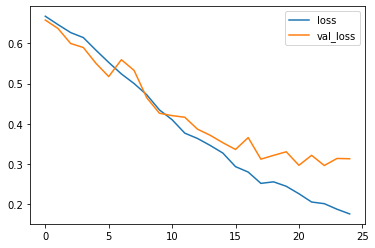

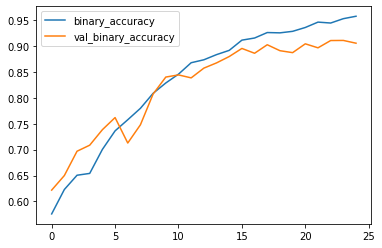

In [4]:
from IPython.core.display_functions import display
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame[['loss','val_loss']].plot()
history_frame[['binary_accuracy','val_binary_accuracy']].plot();

display(history_frame)